In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


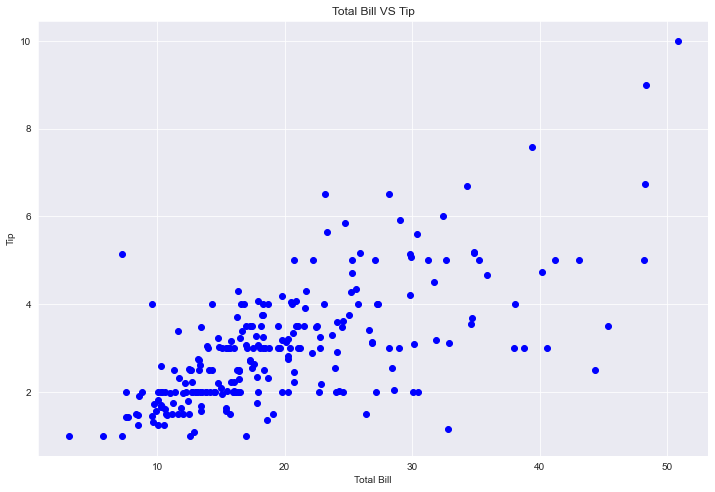

In [9]:
## plotting the total bill vs tip

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.plot(df['total_bill'], df['tip'], 'bo')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill VS Tip');

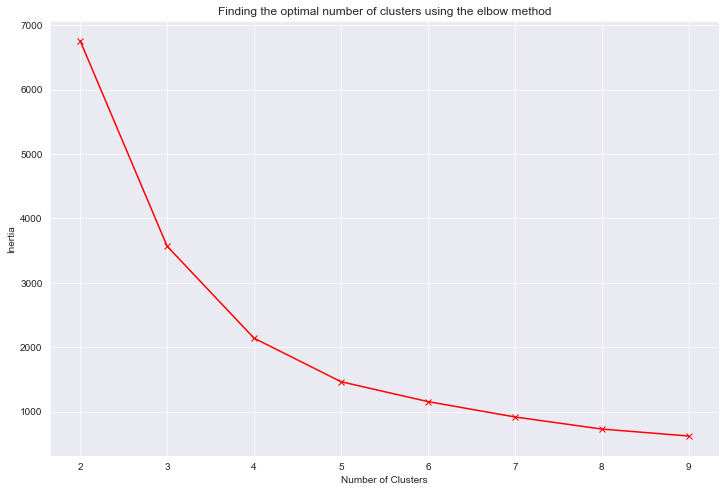

In [10]:
## clustering the dataframe using the total_bill, tip and size column
## finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
inertia_list = [KMeans(n_clusters=i).fit(df[['total_bill','tip']]).inertia_ for i in range(2,10)]

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.plot(list(range(2,10)),inertia_list, 'rx', ls='solid')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Finding the optimal number of clusters using the elbow method');

**Here by the looks of the graph, optimal number of clusters for the kmeans model could be 4 or 5**

In [11]:
## finding the optimal number of clusters using the silhouette score

from sklearn.metrics import silhouette_score

sil_score_list = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['total_bill','tip']])
    sil_score_list.append(silhouette_score(df[['total_bill','tip']],kmeans.labels_))

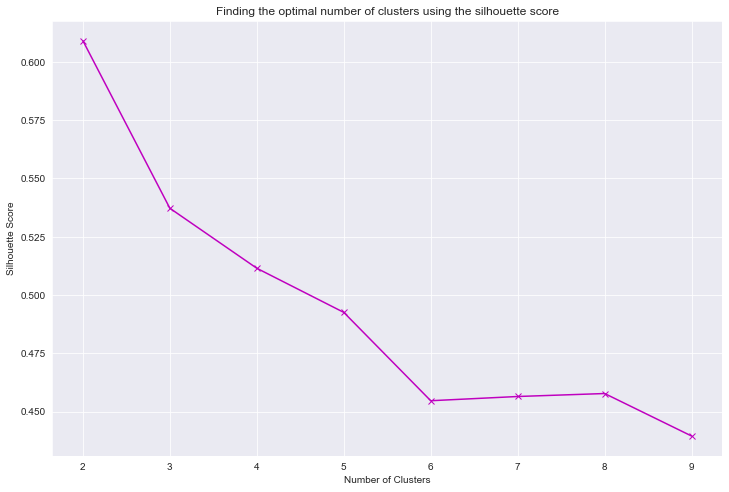

In [12]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.plot(list(range(2,10)),sil_score_list, 'mx', ls='solid')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Finding the optimal number of clusters using the silhouette score');

**By observing the plot, we can tell that the optimal number of clusters could be 4 or 5 since for these values we don't have too high inertia and also we have decent value of the silhouette score**

In [13]:
## finding the optimal number of clusters for the kmeans model using the kneed library
from kneed import KneeLocator

kn = KneeLocator(range(2,10), inertia_list, curve='convex',direction='decreasing')
print(f"The optimal number of clusters for the kmeans model: {kn.knee}")

The optimal number of clusters for the kmeans model: 4


In [14]:
## using the number of cluster equal to 4 for clustering the data
kmeans_final = KMeans(n_clusters=4)
kmeans_final.fit(df[['total_bill','tip']])
pred = kmeans_final.predict(df[['total_bill','tip']])

In [15]:
df['cluster'] = pred

In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,cluster
0,16.99,1.01,Female,No,Sun,Dinner,2,2
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,3
4,24.59,3.61,Female,No,Sun,Dinner,4,3


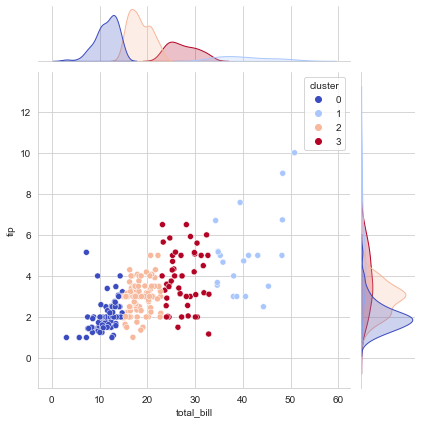

In [17]:
## plotting the data after clustering
sns.set_style('whitegrid')
sns.jointplot(x='total_bill', y='tip', data=df, hue='cluster',palette='coolwarm');